# End to End ML Project

### Steps for ML Project 
1. Import libraries
2. Data Cleaning
3. EDA
4. Data Preprocessing
5. Model Fitting
6. Model Evaluation 
7. Model Optimization
8. Model Interpretation
9. Model Deployment in Streamlit

In [1]:
#!pip install imbalanced-learn

In [2]:
#!pip install shap --user

In [3]:
#!pip install streamlit

In [4]:
#!pip install imbalanced-learn

In [5]:
#!pip install xgboost

### Import Libraries

In [6]:
# for data manipulation 
import pandas as pd
import numpy as np

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12,7))
plt.style.use("fivethirtyeight")

# import libraries for data preprocessinhg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# librarie for metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix

# libraries for optimization and interpretation
import shap

# for warnings
import warnings
warnings.filterwarnings("ignore")
print("All libraries are imported")

All libraries are imported


<Figure size 1200x700 with 0 Axes>

In [7]:
# get the data 
data=pd.read_csv("data.csv")

In [8]:
# view the data 
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [10]:
#check for null
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# check for zero errors 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [12]:
# check for duplicates 
data.duplicated().sum()

0

**Observations**
1. The data has 768 rows and 10 columns 
2. Column Unnamed: 0 is a reducndnat column and will be dropped
3. Columns Pregnancies, Glucose, BloodPressure, SkinThickness , Insulin and BMI have 0 errors and has to be impyuted with column medians 
4. There are no missing values
5. Only outcome is categorical and it has to encoded before modelling
6. There are no duplicates



In [13]:
# drop the Unnamed column 
data.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
# impute zero errors
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, axis=0)

In [15]:
# check descriptives again
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


Data looks good for EDA 

### Exploratory Data Analysis(EDA)
- Univariate Analysis
         -- numerical - histplots and boxplots 
         -- categorical
- Bivariate Analysis 
         -- categorical vs numerical
         -- numerical vs numerical 
- Multivariate 
         -- pairplots 
- Correlations 
         -- heatmaps

In [16]:
# Lets do Univariate Histograms 
def histograms(data):
    data.hist()
    plt.tight_layout()
    plt.show()

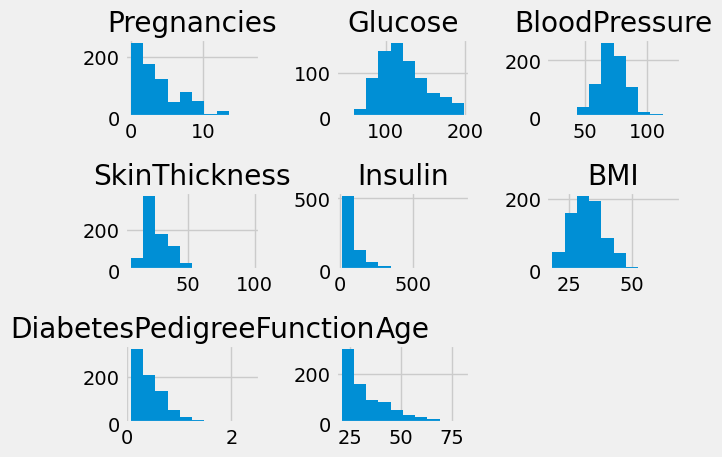

In [17]:
histograms(data)

In [18]:
# Lets do side by side histplot adn boxplots 
def histplot_boxplot(data, feature, figsize=(12,7), bins=None):
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios":(0.25, 0.75)},
    figsize=figsize )
    
    sns.boxplot(data=data, x=feature, showmeans=True, color="violet", ax=ax_box)
    sns.histplot(data=data, x=feature,pallete="winter", bins=bins, ax=ax_hist) if bins else sns.histplot(data=data,
                                                                     x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), linestyle="--", color="green")
    ax_hist.axvline(data[feature].median(), linestyle="-", color="black")
    plt.show()

Pregnancies


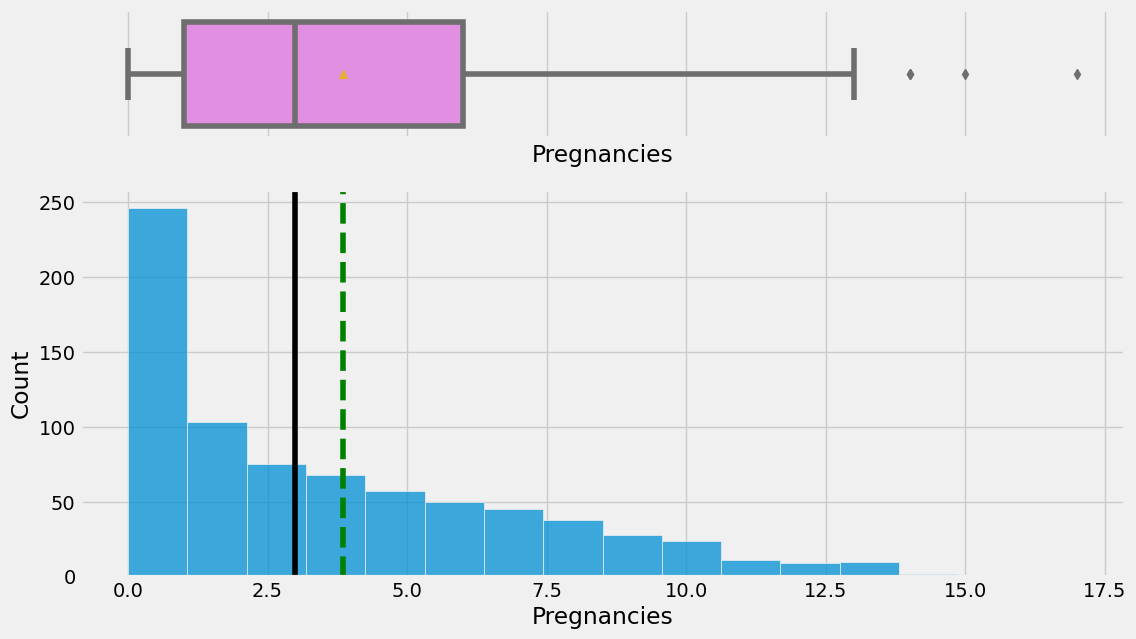

Glucose


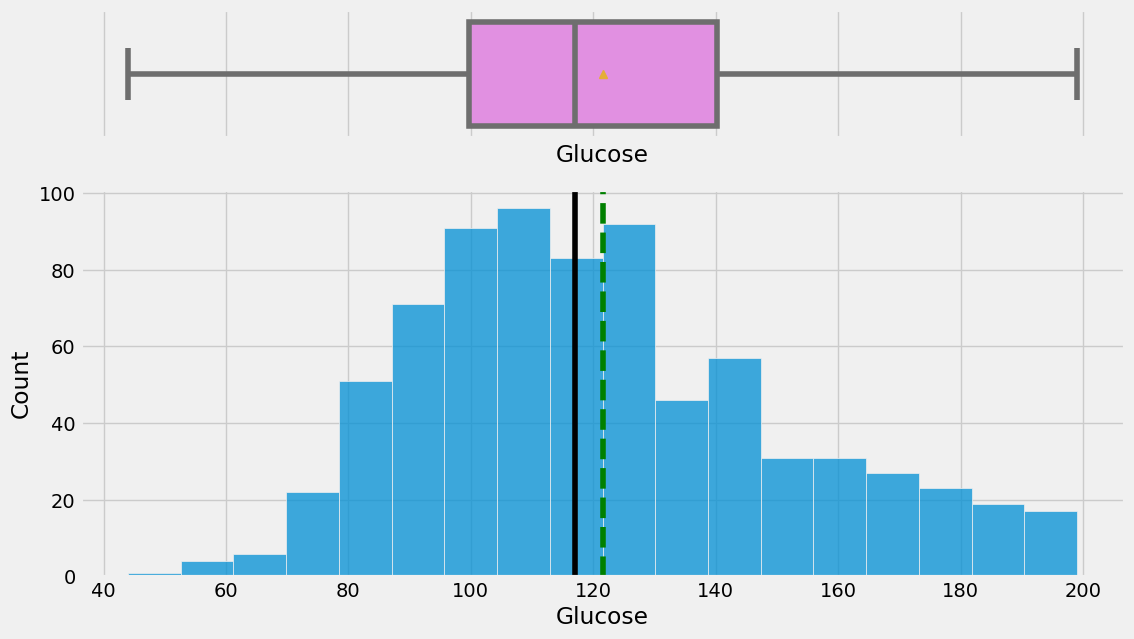

BloodPressure


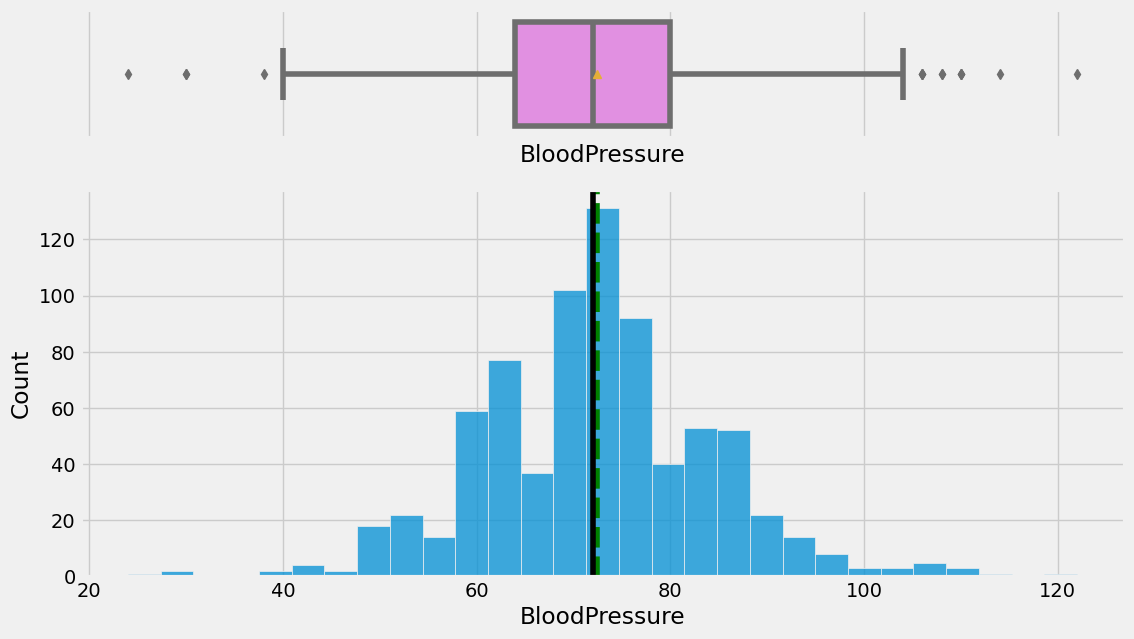

SkinThickness


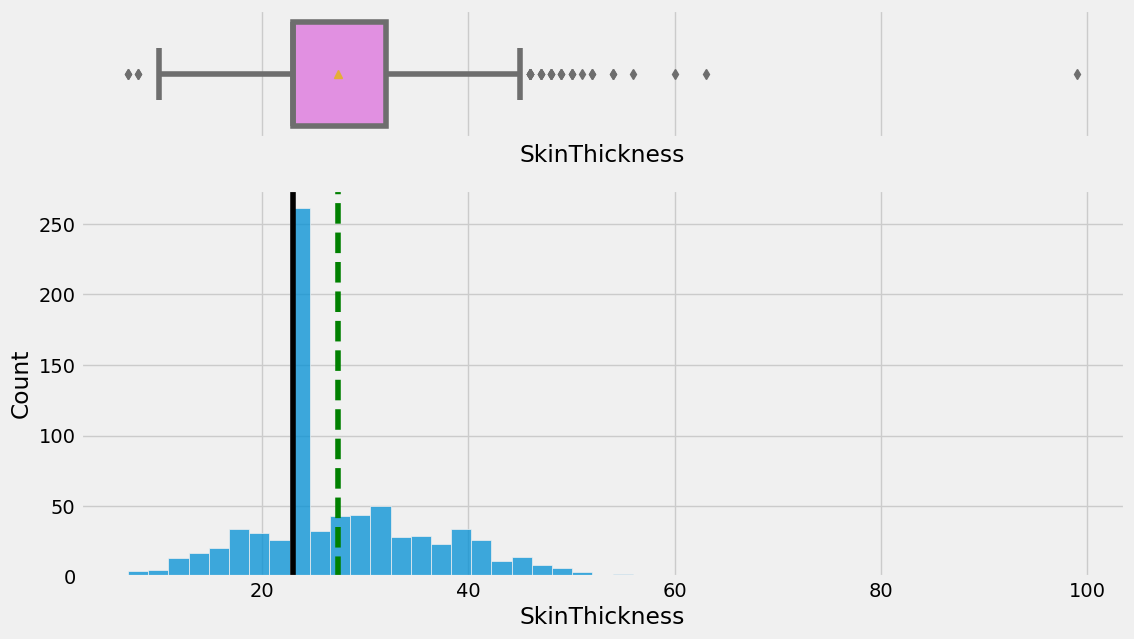

Insulin


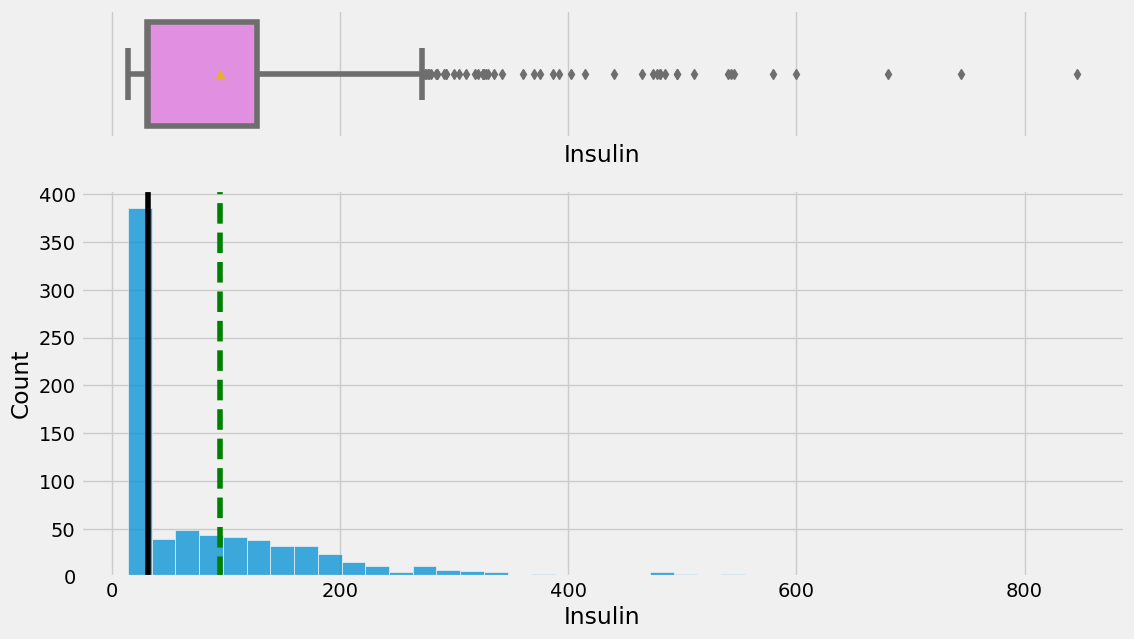

BMI


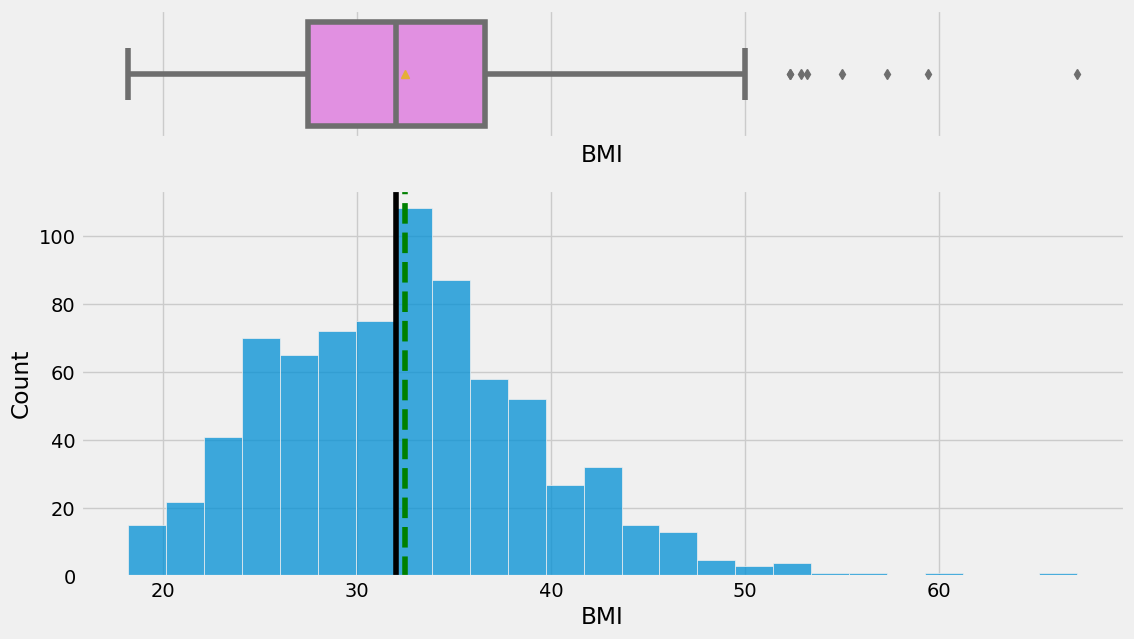

DiabetesPedigreeFunction


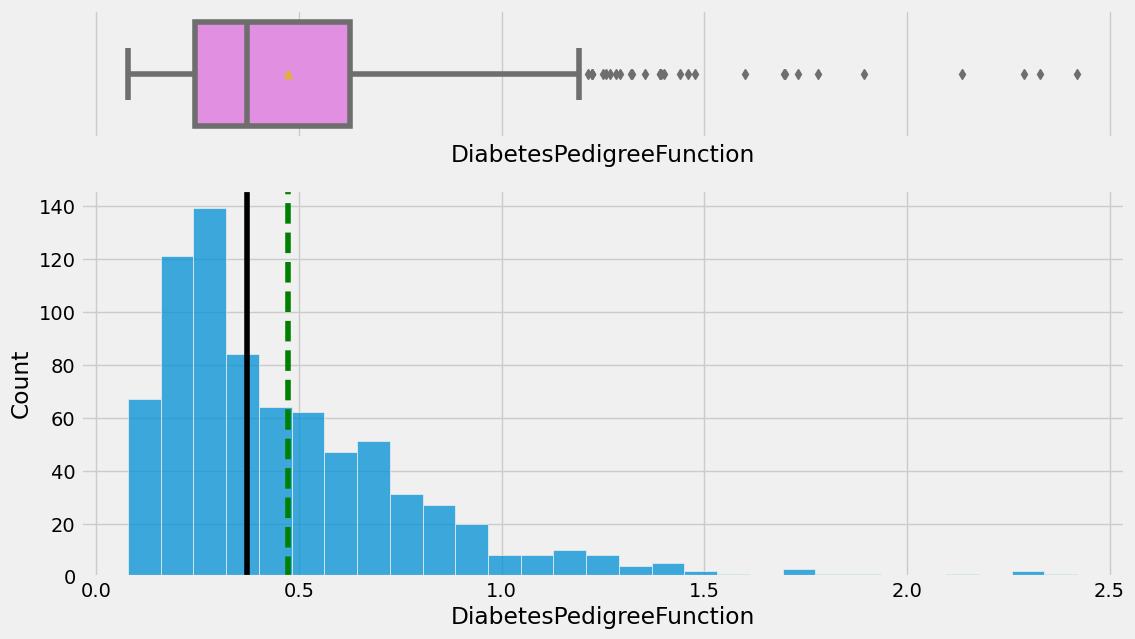

Age


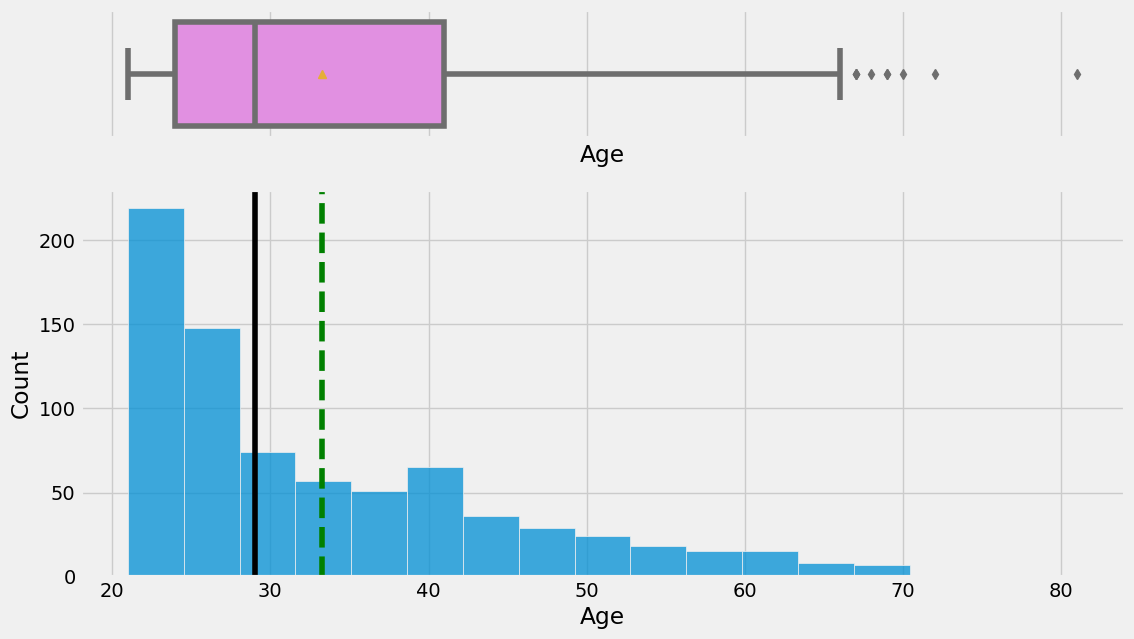

In [19]:
for col in data.select_dtypes(exclude="O").columns:
    print(col)
    histplot_boxplot(data=data, feature=col)
    plt.show()
    
    

Observations
1. Outliers- Preganancies, SkinThickness, Insulin , Diabetes Pedigree Function have lots of outliers we may need to cap the outer limit 
2. Skew- SkinThickness, Insulin , Diabetes Pedigree Function are highly right skewed and needs to be transformed using log or square root

In [20]:
# univariate Countplot
def countplot(data, feature):
    plt.figure(figsize=(12,7))
    ax=sns.countplot(data=data, x=feature, color="green")
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.3g}%".format(100.*y/len(data)), (x.mean(), y), ha="center", va="bottom")
    plt.show()

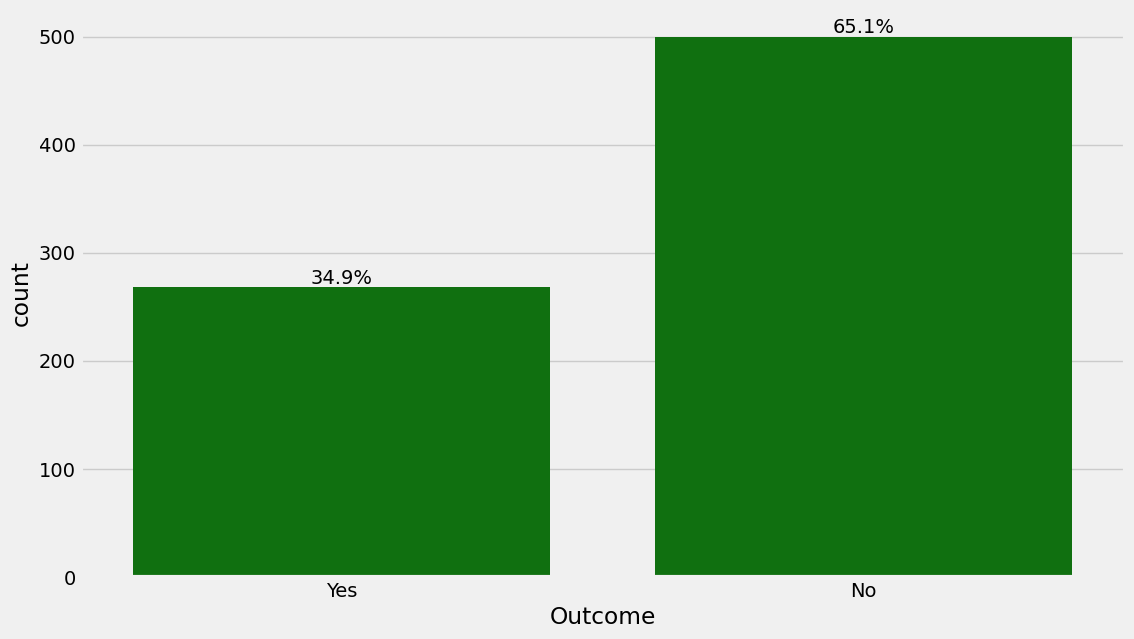

In [21]:
countplot(data=data,feature="Outcome")

The Outcome variable is not balanced. We would need for solve for data imbaalnce before modelling

In [22]:
# Bivariate -categorical vs numerical
def bivariate_barplot(data, feature1, feature2):
    data.groupby(feature1)[feature2].mean().plot(kind="bar", color="orange")
    plt.ylabel(col)
    plt.show()

Outcome vs  Pregnancies


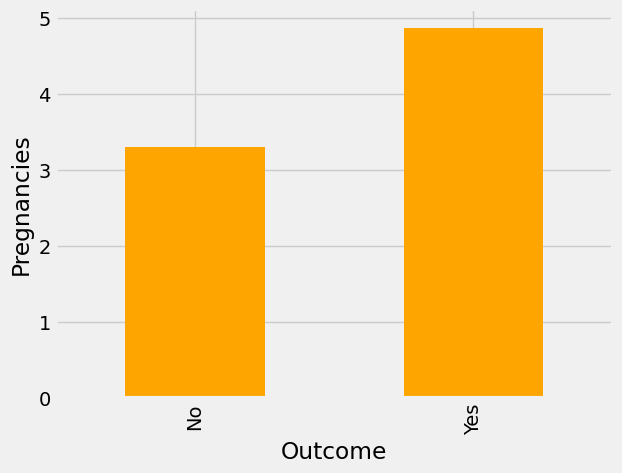

**************************************
Outcome vs  Glucose


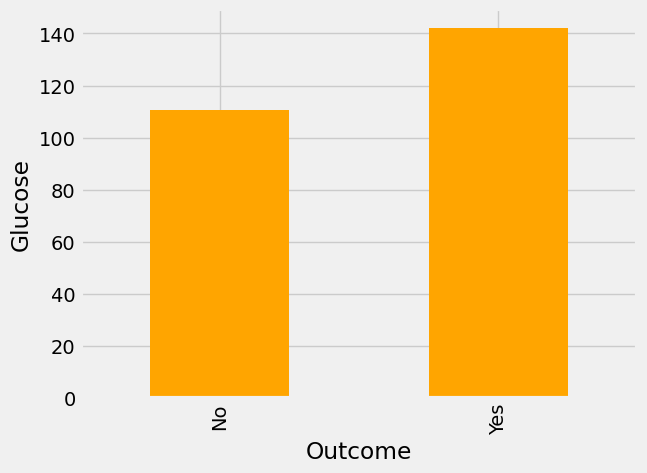

**************************************
Outcome vs  BloodPressure


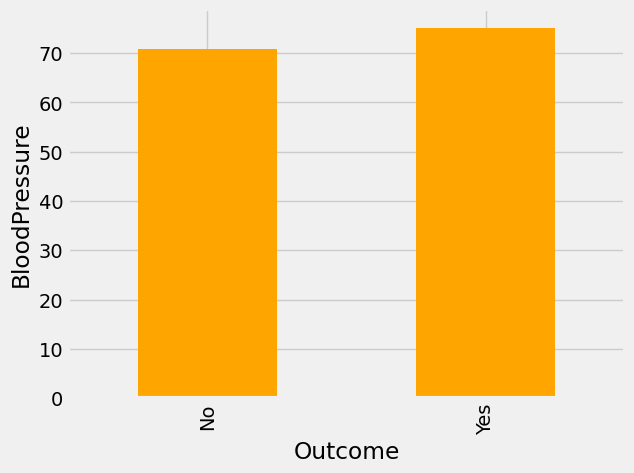

**************************************
Outcome vs  SkinThickness


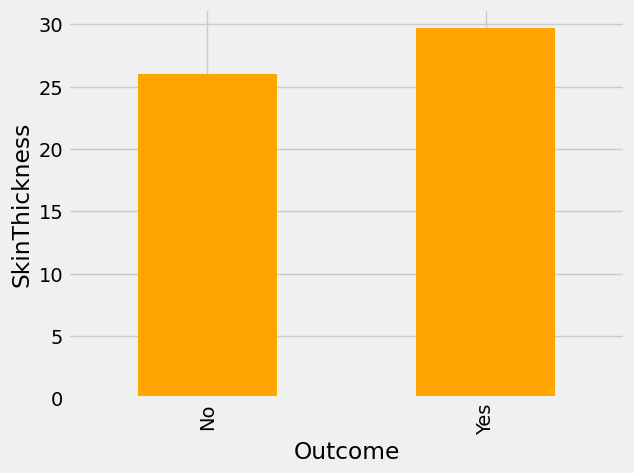

**************************************
Outcome vs  Insulin


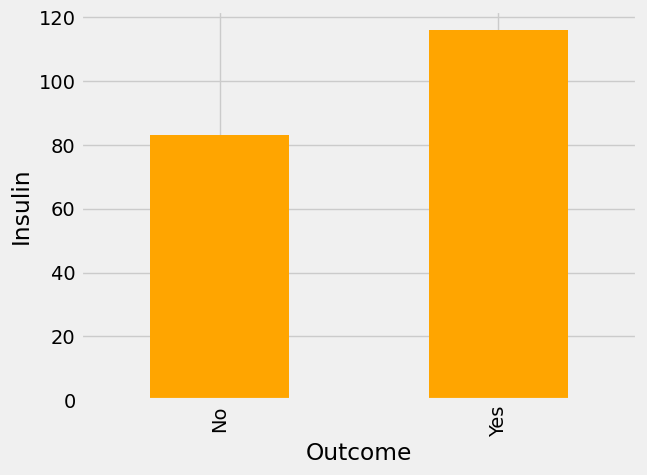

**************************************
Outcome vs  BMI


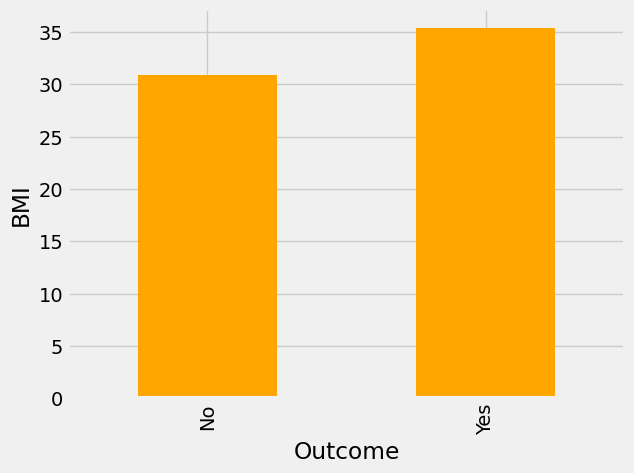

**************************************
Outcome vs  DiabetesPedigreeFunction


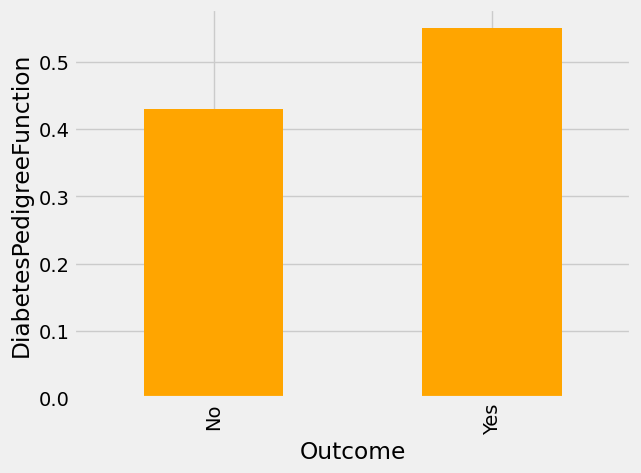

**************************************
Outcome vs  Age


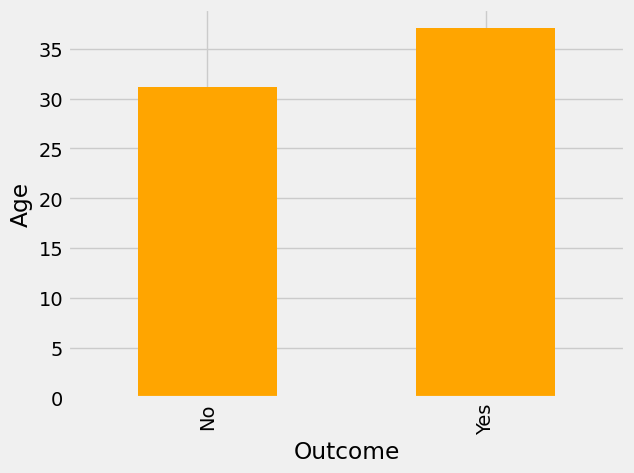

**************************************


In [23]:
for col in data.select_dtypes(exclude="O").columns:
    print("Outcome vs ", col)
    bivariate_barplot(data=data, feature1="Outcome",feature2= col)
    print("**************************************")

Those with higher Pregnancies, Glucose, Insulin, BMI and Age are more likely to be diabetic

In [24]:
# numericall vs numerical
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color="green")
    plt.title("Lineplotbetween {0} and {1}".format(feature1, feature2))
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color="orange", hue="Outcome")
    plt.title("Scatter Plot Between {0} and {1}".format(feature1, feature2))
    plt.show()

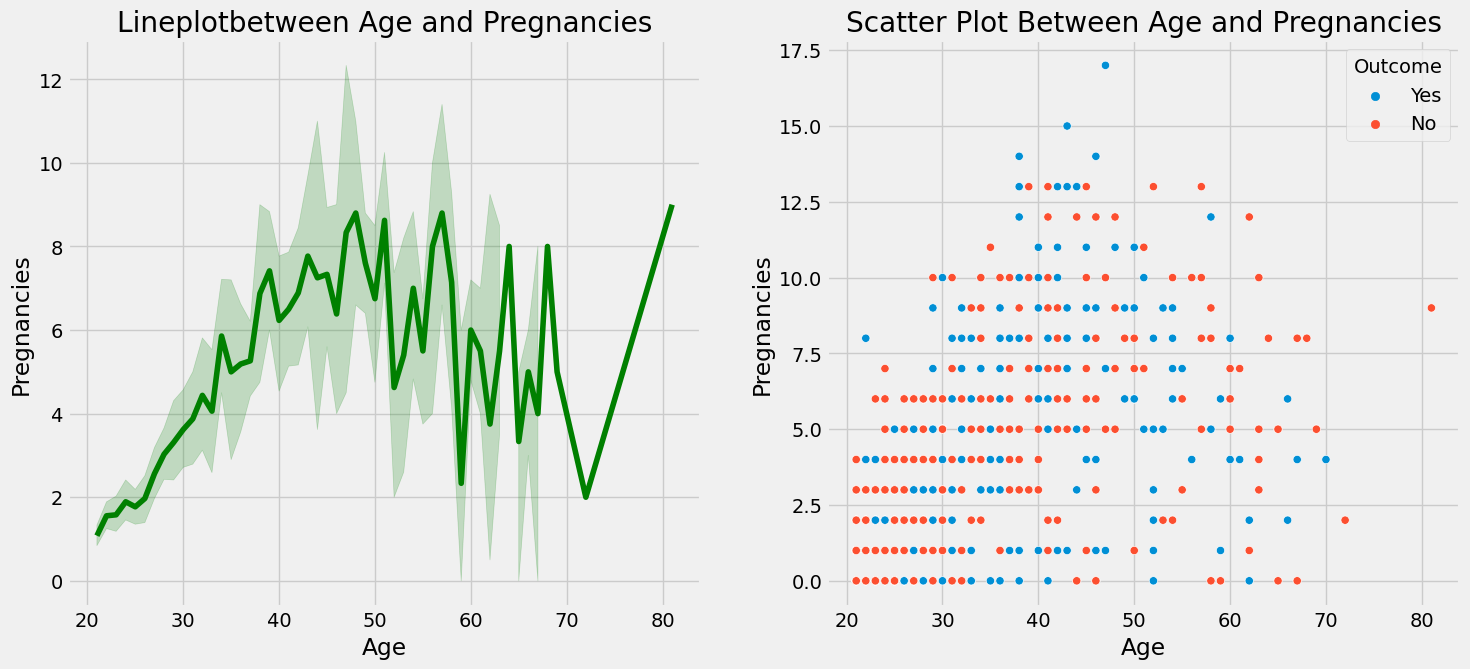

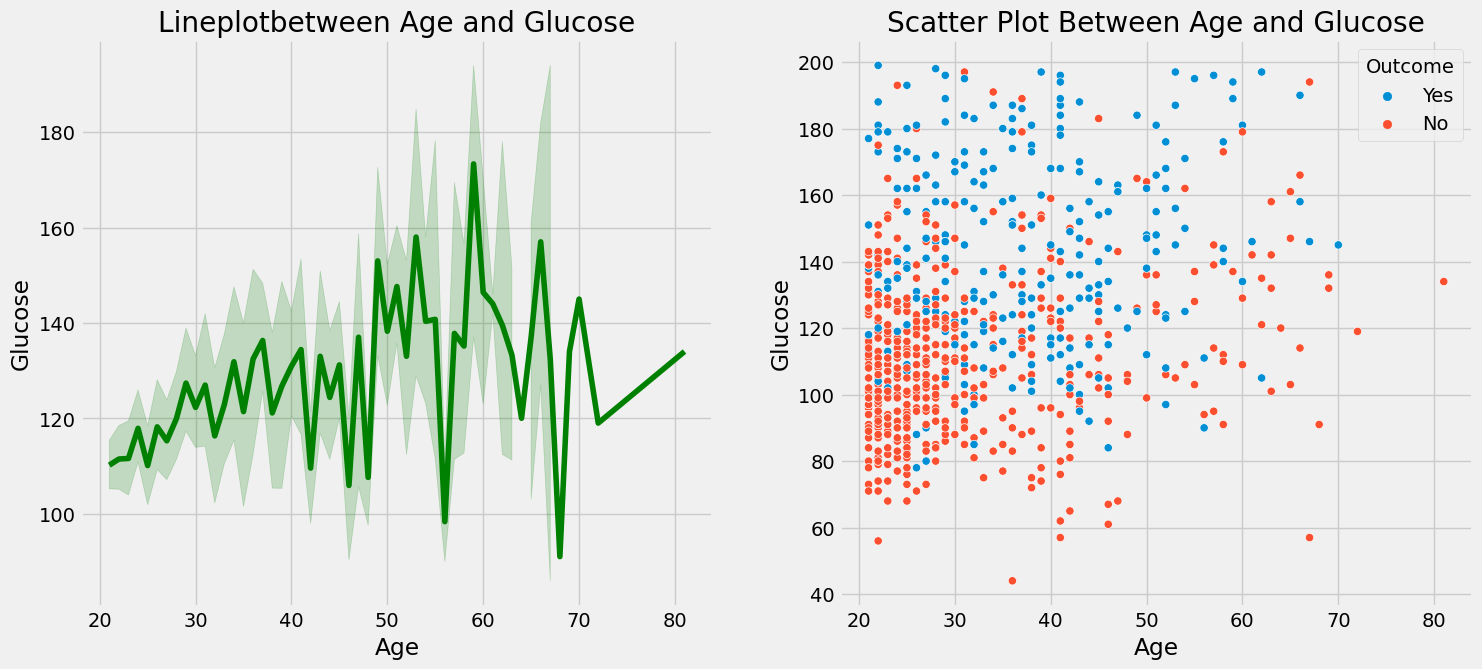

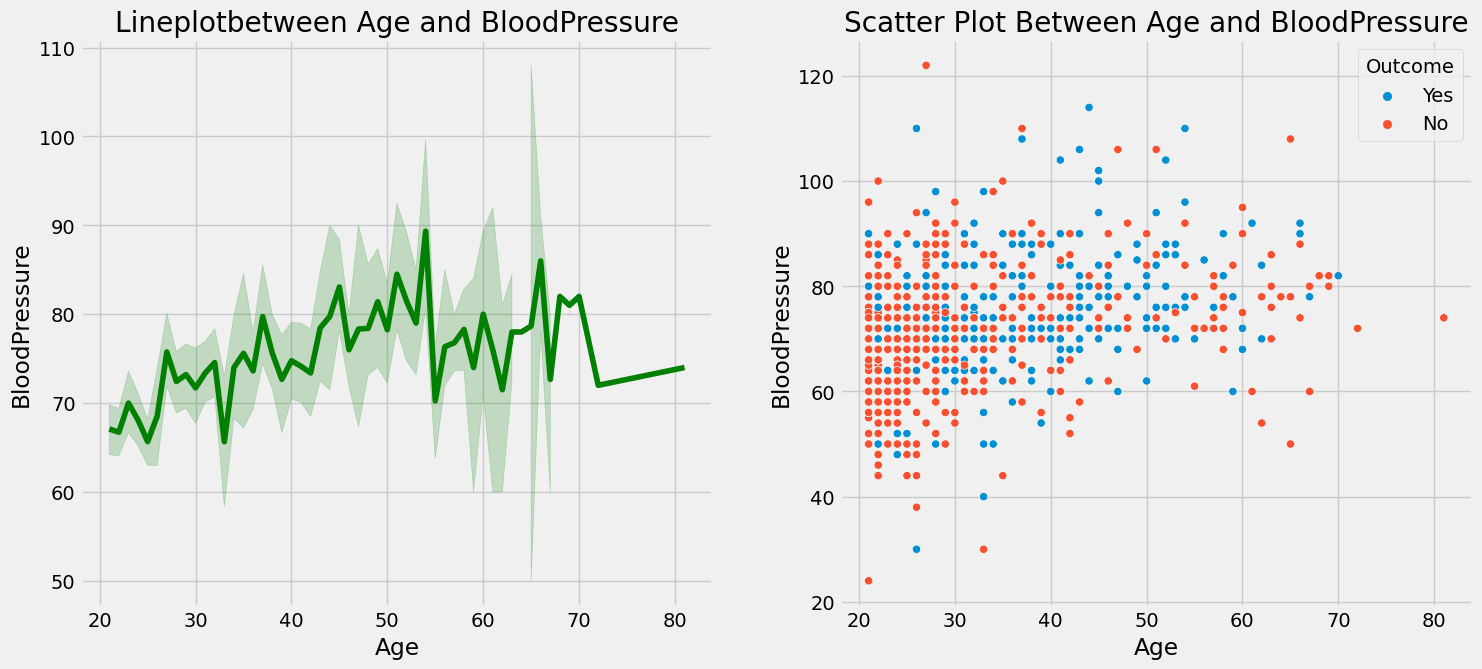

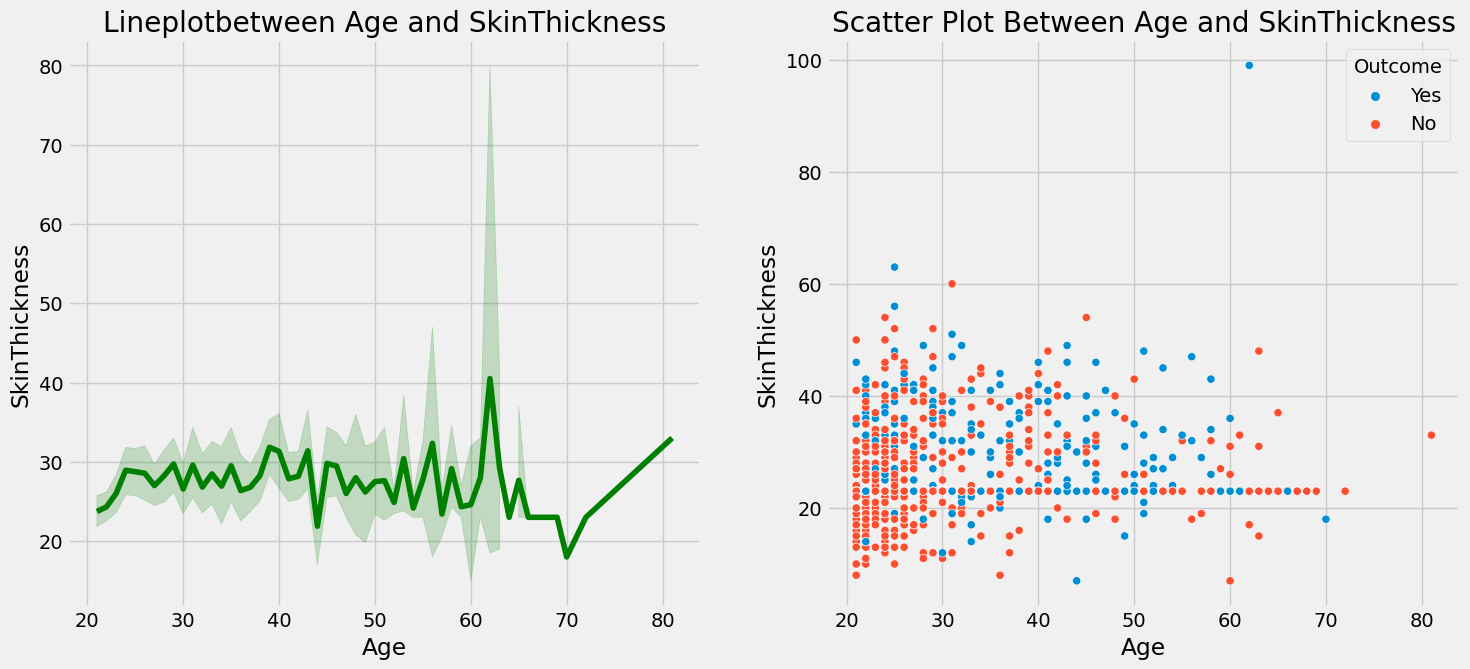

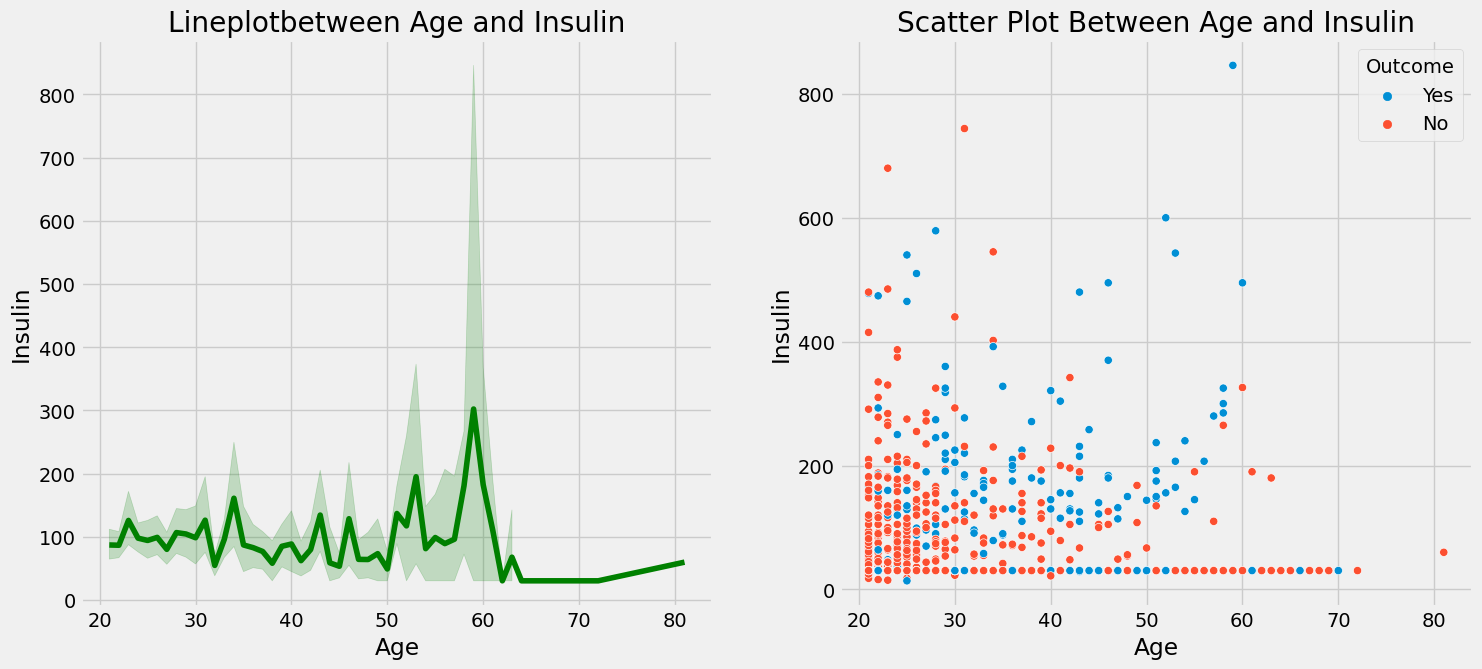

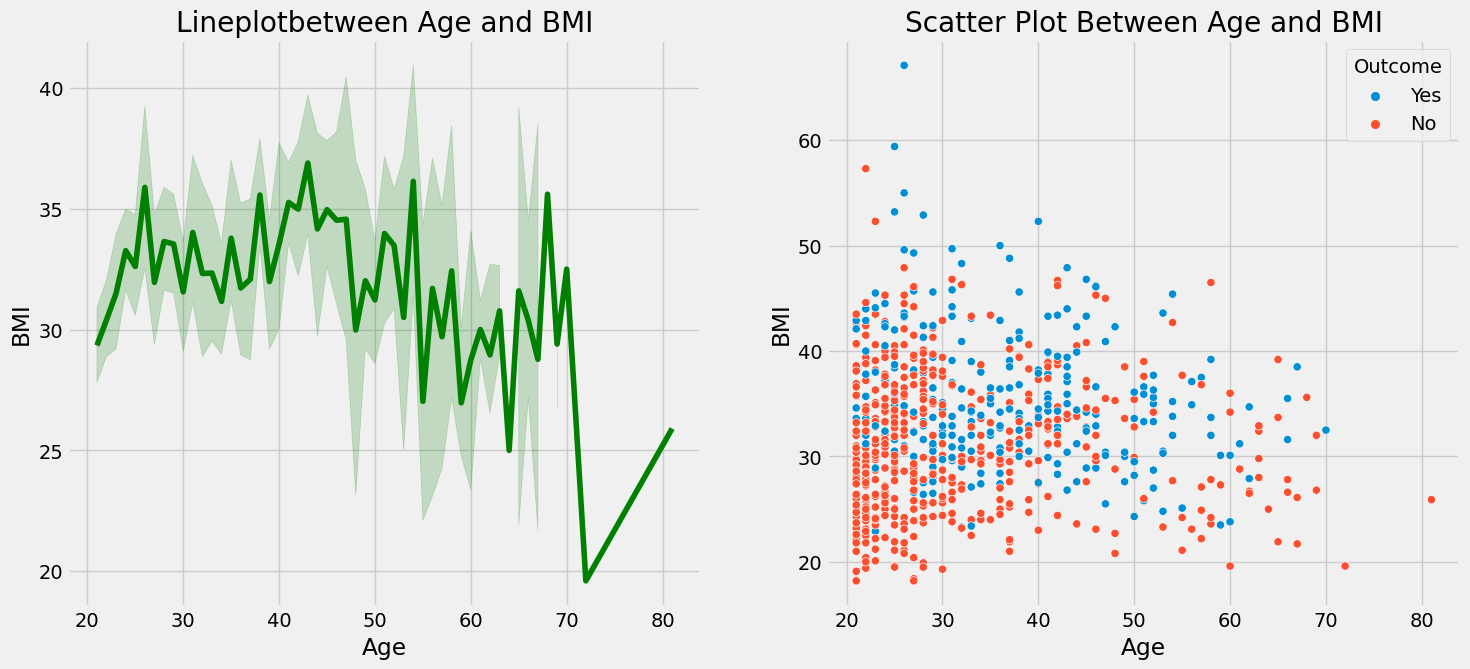

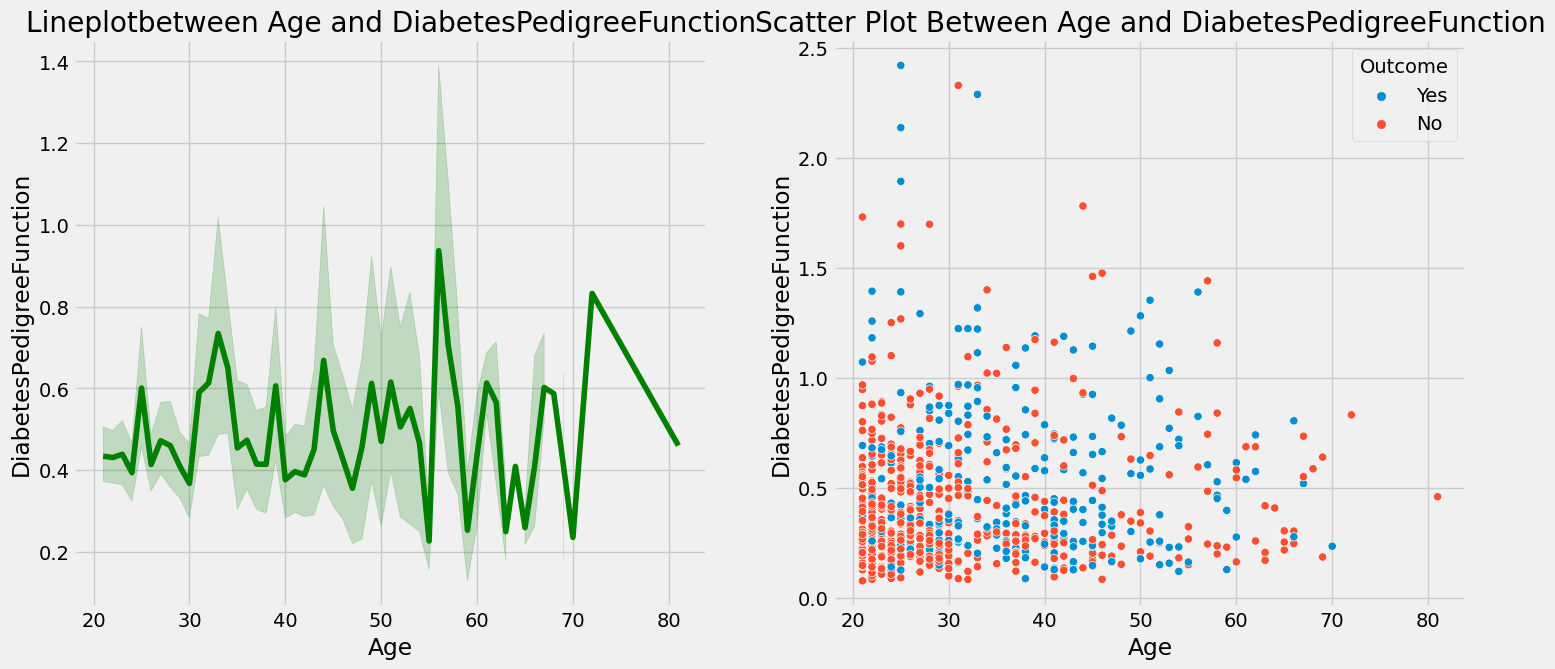

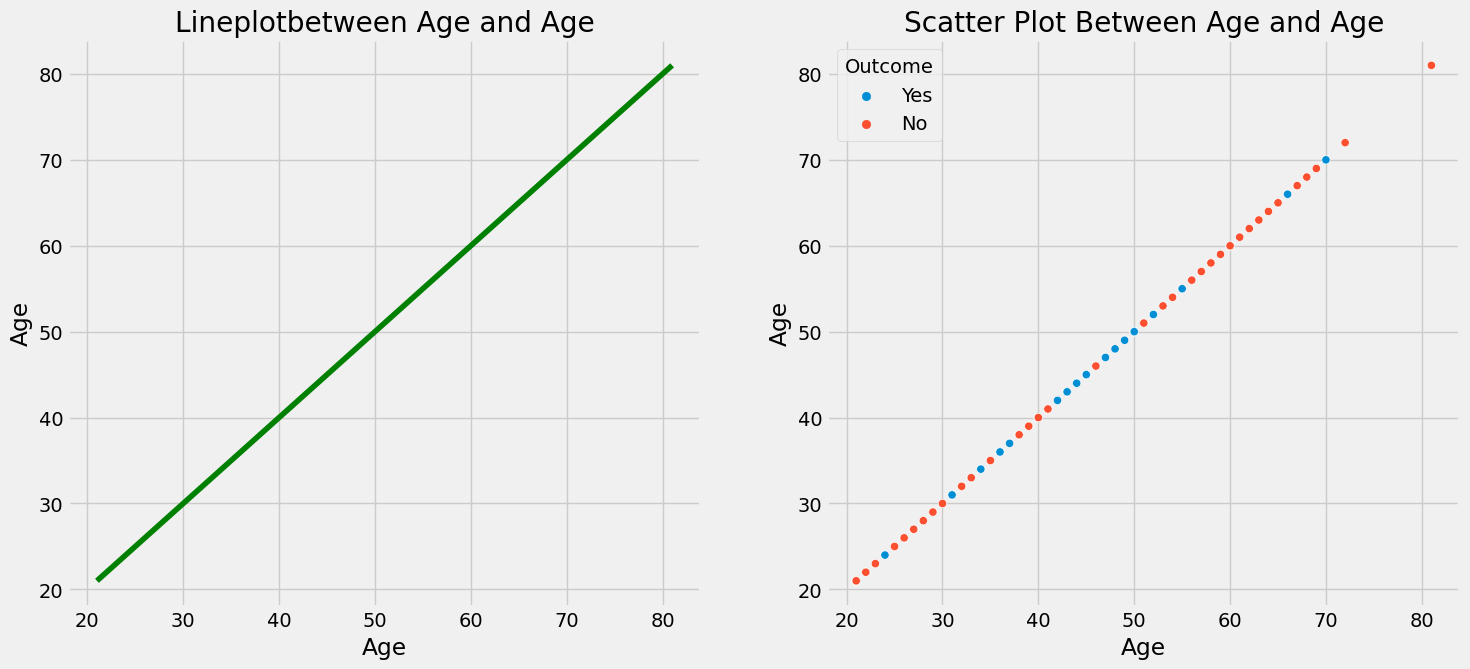

In [25]:
for col in data.select_dtypes(exclude="O").columns:
    lineplot_scatterplot(data=data, feature1="Age", feature2=col)
    
    

In [26]:
# create acorrelation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


In [27]:
df=data.copy()
d={"Yes":1, "No":0}
df["Outcome"]=df["Outcome"].map(d)

In [28]:
df[df.columns[:]].corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [ ]:
sns.pairplot(df, hue="Outcome", kind='reg')

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=+1)

From the above graphs we can see that Glucose, Age and BMI are the strongest predictors of Diabetes

# To be continued..

### Preprocessing
1. Seperate the features and label
2. Label encoding of deatures
3. Num value imputation
4. Solving data imbalance
5. Train test split
6. Feature selection

In [ ]:
def preprocess(data,label):
    X = data.drop(label,axis=1)
    y=data[label]
    sm=SMOTE()
    X,y=sm.fit_resample(X,y)
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    return x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test=preprocess(df,label='Outcome')

In [ ]:
y_train

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

In [ ]:
#the data is ready for modeling

In [ ]:
# Modeling and Evaluation

In [ ]:
def print_metrics(y_test,y_pred,model_name):
    print('Metric for the model ',model_name)
    print('')
    print('Accuracy_score : ',accuracy_score(y_test,y_pred))
    print('')
    print('Precision_score : ',precision_score(y_test,y_pred))
    print('')
    print('Recall_score : ',recall_score(y_test,y_pred))
    print('')
    print('F1_score : ',f1_score(y_test,y_pred))
    print('')
    print('Roc_Auc_Score : ',roc_auc_score(y_test,y_pred))
    print('')


In [ ]:
def plot_metrics(clf, x_train, x_test, model_name):
    print('Model Evaluation plots')
    plot_confusion_matrix(clf, x_train,x_test, display_labels = [0,2])
    plot_roc_curve(clf, x_train, x_test)
    plot_precision_recall_curve(clf, x_train, x_test)



In [ ]:
# fit and evaluate knn model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_test,y_pred, 'KNN')

In [ ]:
# optimize k using a model complexity curvve

neighbours=np.arange(1,25)
train_accuracies=np.empty(len(neighbours))
test_accuracies=np.empty(len(neighbours))



#enumurate over neighbour and fit 20 models

for i ,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracies[i]=knn.score(x_train,y_train)
    test_accuracies[i]=knn.score(x_test,y_test)
    
    
# plot these accuracies in a model complexity plot


plt.plot(neighbours,train_accuracies,label='Train_Accuracies')
plt.plot(neighbours,test_accuracies,label='Test_Accuracies')
plt.legend()
plt.title('Model Complexitty Plots')
plt.xlabel('No of Neighbour')
plt.ylabel('Accuracies')
plt.xticks(np.arange(1,25,1))
plt.show()

In [ ]:
# fit and evaluate knn model
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_test,y_pred, 'KNN')

In [ ]:
# fit and evaluate knn model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_test,y_pred, 'KNN')

In [ ]:
#fit and evaluate all model


clfs={
    'Logreg': LogisticRegression(),
    'Naviebay':GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'Randamforest':RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'Xgboost':XGBClassifier(),
    'SVM':SVC()}



models_report=pd.DataFrame(columns=['model_name','accuracy','recall','precision','f1score'])



for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('Fitting classifier  .... ',clf_name)
    t=pd.Series({'model_name':clf_name,
                'accuracy':accuracy_score(y_test,y_pred),
                'recall':recall_score(y_test,y_pred),
                 'precision':precision_score(y_test,y_pred),
                 'f1score':f1_score(y_test,y_pred)})
    models_report=models_report.append(t,ignore_index=True)

    
    
models_report=models_report.sort_values(by='f1score',ascending=False)
    

In [ ]:
models_report



In [ ]:
rfc=RandomForestClassifier()

In [ ]:
#lets optimize the best performing vanilla model random forest



param_grid={
    'n_estimators':[100,150,200,250,300],
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_depth':range(1,5,1),
    'max_features': ['sqrt','log2'],
    'criterion':['gini','entropy']
}

n_folds=3
cv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,
                cv=n_folds,n_jobs=-1,verbose=5,return_train_score=False,scoring='f1')
cv.fit(x_train,y_train)
cv.best_score_

In [ ]:
cv.best_estimator_

In [ ]:
rfc_tuned=cv.best_estimator_
rfc_tuned.fit(x_train,y_train)
y_pred=rfc_tuned.predict(x_test)
print_metrics(y_test,y_pred,'RFC TUNNED')

In [ ]:
#interpreting model

In [ ]:
X=df.drop('Outcome',axis=1)
value=shap.TreeExplainer(rfc_tuned).shap_values(x_test)
shap.summary_plot(value,x_train,plot_type='bar',feature_names=X.columns)

In [ ]:
#gulcose,age,bmi are top predictors of diabets

In [ ]:
#creating the model pipeline

In [ ]:
from sklearn.pipeline import Pipeline
sc=StandardScaler()
rfc_tuned=rfc_tuned
steps=[('scaler',sc),('RC Tuned' ,rfc_tuned)]
pipeline=Pipeline(steps)
x_train,x_test,y_train,y_test=preprocess(df,label='Outcome')
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print_metrics(y_test,y_pred,'Pipeline')

In [ ]:
#freeze the model

import pickle
model=open('rfc.pickle','wb')
pickle.dump(pipeline,model)
model.close()

In [ ]:
#deploy the pickled model in stremlit


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from sklearn.preprocessing import StandardScaler
st.title("Medical Diagnostic App")
st.markdown("Does the women have diabetes or not ? 👩‍⚕️")


# Step1: Load the pickled model
model = open("rfc.pickle", "rb")
clf = pickle.load(model)
model.close()



# Step2: Get the user input from the front end 
pregs = st.number_input("Pregnancies", 0, 20, step=1)
glucose = st.slider("Glucose", 20, 200, 40)
bp = st.slider("BloodPressure", 20, 140, 20)
skin = st.slider("SkinThickness", 5, 100, 5)
insulin = st.slider("Insulin", 14.0, 846.0, 14.0)
bmi = st.slider("BMI", 15.0, 70.0, 15.0)
dpf = st.slider("DiabetesPedigreeFunction", 0.05, 2.50, 0.05)
age = st.slider("Age", 21, 90, 21)




# step3 Converting user input to model input
data={
    'Pregnancies':pregs , 
    'Glucose':glucose,
    'BloodPressure':bp, 
    'SkinThickness':skin, 
    'Insulin':insulin,
    'BMI':bmi , 
    'DiabetesPedigreeFunction':dpf, 
    'Age':age
}

input_data= pd.DataFrame([data])
#st.write(input_data)


#step 4: Get the model prediction and print it
prediction=clf.predict(input_data)
if st.button('Prediction'):
    if prediction == 1:
        st.subheader('The woman has Diabetics')
        
    if prediction == 0:
        st.subheader('The woman is Healthy')

In [ ]:
df[df.columns[:]].agg(['min','max'])

In [ ]:
df.columns